In [332]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pprint as pprint
import re

%matplotlib inline

## Reading in Data

Starting with general data - day-to-day stuff.

In [98]:
data_path = "./data/"
general = pd.read_csv(data_path + "general.csv", skiprows=1, \
                      names=["Event", "Start_time", "End_time"])

In [99]:
general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 3 columns):
Event         1302 non-null object
Start_time    1302 non-null object
End_time      1302 non-null object
dtypes: object(3)
memory usage: 30.6+ KB


Let's start by converting columns to their proper types.

In [100]:
general['Event'] = general['Event'].astype(str)
general['Start_time'] = pd.to_datetime(general['Start_time'])
general['End_time'] = pd.to_datetime(general['End_time'])

In [101]:
general['Start_time'].min(), general['End_time'].max()

(Timestamp('2009-06-08 23:00:00'), Timestamp('2018-09-19 16:45:00'))

## Filter data by date

Our data ranges from June 2009 to September 2018 (future events).

In [102]:
def filter_by_date(pd, date_start, date_end):
    """
    Return dataframe with rows where 'Start_time' is between date_start and date_end.
    Params:
        pd: dataframe with 'Start_time' column
        date_start: string with start date in MM/DD/YYYY format
        date_end: string with end date in MM/DD/YYYY format
    """
    start = datetime.strptime(date_start, "%m/%d/%Y")
    end = datetime.strptime(date_end, "%m/%d/%Y")
    return pd[(pd['Start_time'] > start) & (pd['End_time'] < end)]

In [103]:
# start and end dates for UCLA Fall 2017 quarter
fall_2017_start = "09/25/2017"
fall_2017_end = "12/16/2017"

general_f17 = filter_by_date(general, fall_2017_start, fall_2017_end)

In [104]:
general_f17.shape

(210, 3)

### Let's look at Fall Quarter 2017.

Looks like we have 210 events from Fall 2017.

I'm interested in how long events are - let's create a column for that.

In [105]:
def total_time(x):
    """
    Return total length, in hours, of an event.
    Params:
        x: dataframe row with 'Start_time' and 'End_time' columns
    """
    return (x['End_time'] - x['Start_time']).total_seconds() / 3600

In [106]:
general_f17.is_copy = False # avoid SettingWithCopyWarning

general_f17['total_time'] = general_f17.apply(lambda x: total_time(x), axis=1)

In [107]:
general_f17.tail()

,Event,Start_time,End_time,total_time
1290,Study - Stats,2017-12-15 02:30:00,2017-12-15 03:00:00,0.50
1291,Study - Math,2017-12-15 03:15:00,2017-12-15 04:00:00,0.75
1292,Study - Math,2017-12-15 14:30:00,2017-12-15 15:00:00,0.50
1293,Study - Math,2017-12-15 16:00:00,2017-12-15 18:45:00,2.75
1294,Study - Math,2017-12-15 20:00:00,2017-12-15 21:15:00,1.25


## Study Time Analysis

Gonna create some columns to indicate whether an event is about studying math, stats, or film.

In [108]:
def is_studying(event, subject):
    """
    Return True if event is about studying the subject, False otherwise.
    Params:
        event: string with event summary
        subject: string
    """
    regex_str = r"study.*{}".format(subject)
    if re.search(regex_str, event, re.IGNORECASE):
        return True
    return False

In [109]:
general_f17.is_copy = False # avoid SettingWithCopyWarning

study_math = general_f17.apply(lambda x: is_studying(x['Event'], "Math"), axis=1)
general_f17['Studying_Math'] = study_math

study_stats = general_f17.apply(lambda x: is_studying(x['Event'], "Stats"), axis=1)
general_f17['Studying_Stats'] = study_stats

study_film = general_f17.apply(lambda x: is_studying(x['Event'], "Film"), axis=1)
general_f17['Studying_Film'] = study_film

## Big picture view: how much time did I spend studying each subject?

In [110]:
math_hours = general_f17.loc[general_f17['Studying_Math'], 'total_time'].sum()
stats_hours = general_f17.loc[general_f17['Studying_Stats'], 'total_time'].sum()
film_hours = general_f17.loc[general_f17['Studying_Film'], 'total_time'].sum()

print("Total time spent studying MATH 131A: {}".format(math_hours))
print("Total time spent studying STATS 101A: {}".format(stats_hours))
print("Total time spent studying FILM TV 6A: {}".format(film_hours))

subjects = ["MATH 131A", "STATS101A", "FILM TV 6A"]
total_times = [math_hours, stats_hours, film_hours]

Total time spent studying MATH 131A: 67.5
Total time spent studying STATS 101A: 77.5
Total time spent studying FILM TV 6A: 27.0


In [285]:
# set matplotlib parameters
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

plt.style.use('seaborn-darkgrid')

# because matplotlib's default colors drive me insane
# inspiration from https://www.canva.com/learn/100-color-combinations/
# stored as numpy arrays for easy subsetting later
fresh_colors = np.array(["#F98866", "#FF420E", "#80BD9E", "#89DA59"]) # 01. Fresh & Bright
crisp_colors = np.array(["#505160", "#68829E", "#AEBD38", "#598234"]) # 04. Crisp & Dramatic
primary_colors = np.array(["#375E97", "#FB6542", "#FFBB00", "#3F681C"]) # 08. Primary Colors
energetic_colors = np.array(["#4CB5F5", "#B7B8B6", "#34675C", "#B3C100"]) # 11. Fresh & Energetic
tropical_colors = np.array(["#4897D8", "#FFDB5C", "#FA6E59", "#F8A055"]) # 33. Fun & Tropical

tropical_colors_2 = tropical_colors[[0,2,3]]

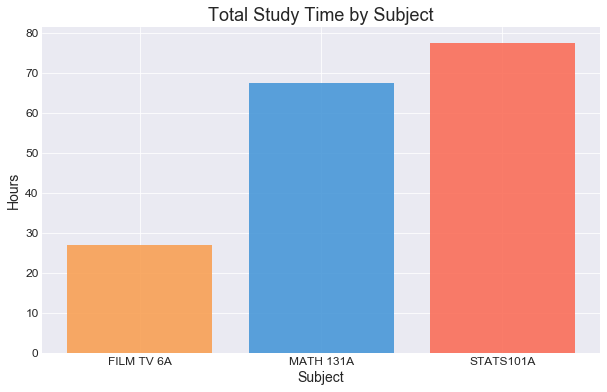

In [288]:
fig, ax = plt.subplots(figsize=(10, 6))

g = ax.bar(subjects, total_times, color=tropical_colors_2, alpha=0.9);

ax.set_title("Total Study Time by Subject")
ax.set_xlabel("Subject")
ax.set_ylabel("Hours")

plt.show()

In [113]:
# change index to day of event
general_f17 = general_f17.set_index(['Start_time'])
general_f17.index = general_f17.index.date

In [114]:
general_f17.head()

,Event,End_time,total_time,Studying_Math,Studying_Stats,Studying_Film
2017-09-25,Codefights,2017-09-25 03:30:00,1.00,False,False,False
2017-09-25,Prep - Internships,2017-09-26 00:15:00,1.25,False,False,False
2017-09-26,Codefights,2017-09-26 03:45:00,1.00,False,False,False
2017-09-26,Read MT Case,2017-09-26 04:30:00,0.50,False,False,False
2017-09-27,Prep - Internships,2017-09-27 04:30:00,1.25,False,False,False


In [115]:
math_data = general_f17.loc[general_f17['Studying_Math'], 'total_time']
stats_data = general_f17.loc[general_f17['Studying_Stats'], 'total_time']
film_data = general_f17.loc[general_f17['Studying_Film'], 'total_time']
all_studying_data = general_f17.loc[(general_f17['Studying_Film'] | general_f17['Studying_Math'] \
                                    | general_f17['Studying_Stats']), 'total_time']

math_by_day = math_data.groupby(math_data.index).sum()
stats_by_day = stats_data.groupby(stats_data.index).sum()
film_by_day = film_data.groupby(film_data.index).sum()
all_studying_data = all_studying_data.groupby(all_studying_data.index).sum()

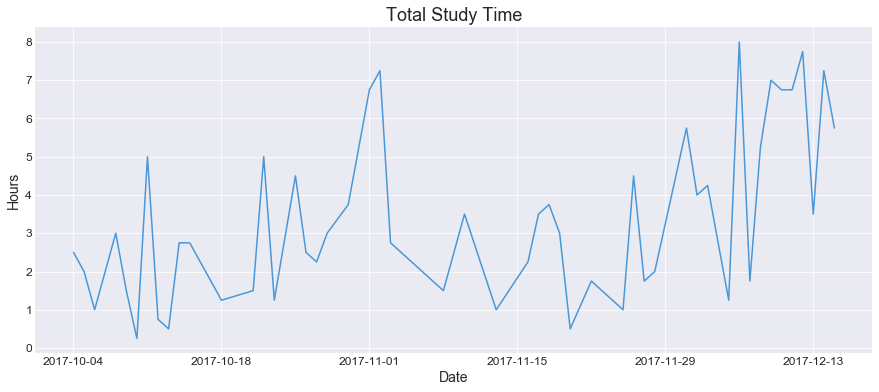

In [290]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(all_studying_data, color=tropical_colors_2[0]);

ax.set_title("Total Study Time")
ax.set_xlabel("Date")
ax.set_ylabel("Hours")

plt.show()

### Breaking it down by subject

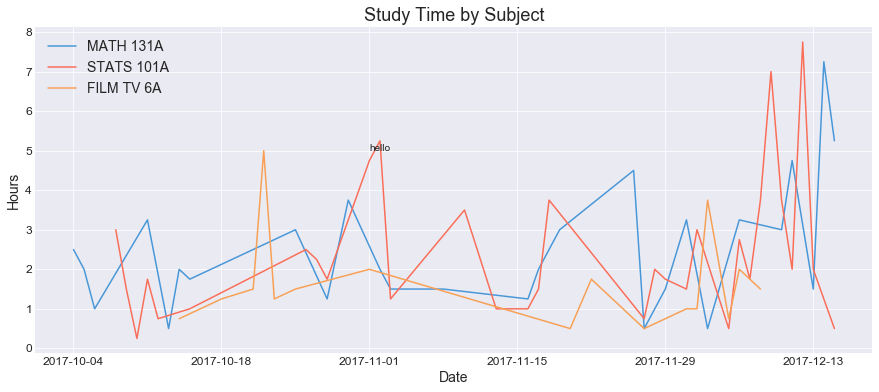

In [344]:
fig, ax = plt.subplots(figsize=(15, 6))

for i, ts in enumerate([math_by_day, stats_by_day, film_by_day]):
    ax.plot(ts, color=tropical_colors_2[i])
    
ax.legend(['MATH 131A', 'STATS 101A', 'FILM TV 6A'])
ax.set_title("Study Time by Subject")
ax.set_xlabel("Date")
ax.set_ylabel("Hours")

# ax.text(datetime(2017, 11, 1), 5, "test")

plt.show()

Hmmmm, let's bin it by week and see what we get.

In [124]:
def group_by_week(df, quarter_start):
    """
    Return dataframe with total time grouped by week.
    Params:
        df: dataframe with date index and 'total time' column
        quarter start: string containing quarter start date in "%m/%d/%Y" format
    """
    week_0 = datetime.strptime(quarter_start, "%m/%d/%Y").isocalendar()[1] # calendar week of wk 0
    by_week = df.groupby(lambda x: x.isocalendar()[1] - week_0, as_index=True).sum()
    return by_week

In [136]:
math_by_week = group_by_week(math_data, fall_2017_start)
stats_by_week = group_by_week(stats_data, fall_2017_start)
film_by_week = group_by_week(film_data, fall_2017_start)
all_studying_by_week = group_by_week(all_studying_data, fall_2017_start)

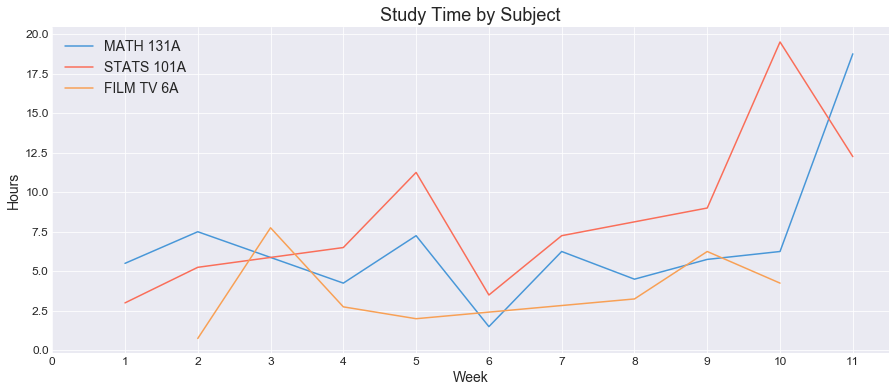

In [342]:
fig, ax = plt.subplots(figsize=(15, 6))

for i, ts in enumerate([math_by_week, stats_by_week, film_by_week]):
    ax.plot(ts, color=tropical_colors_2[i]);

ax.legend(['MATH 131A', 'STATS 101A', 'FILM TV 6A'])
ax.set_title("Study Time by Subject")
ax.set_xlabel("Week")
ax.set_ylabel("Hours")
ax.set_xticks(range(12))

plt.show()

## Bar Charts

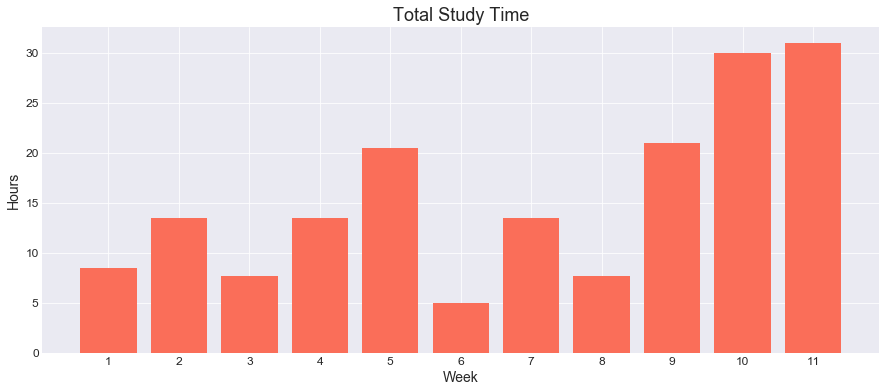

In [294]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(x=all_studying_by_week.index, height=all_studying_by_week, color=tropical_colors_2[1]);

ax.set_title("Total Study Time")
ax.set_xlabel("Week")
ax.set_ylabel("Hours")
ax.set_xticks(all_studying_by_week.index)

plt.show()

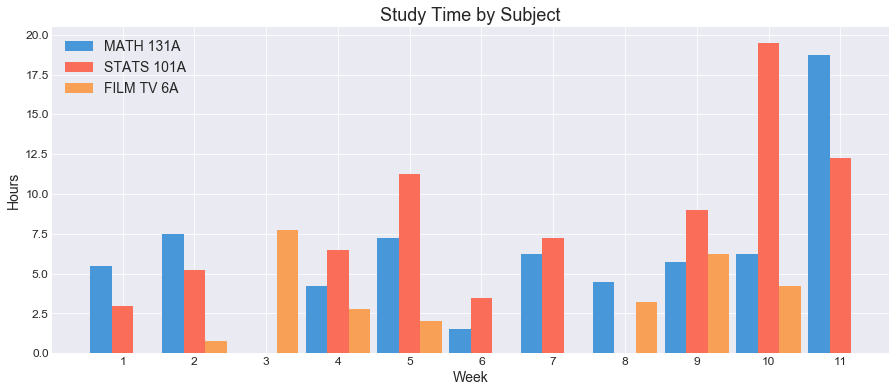

In [292]:
fig, ax = plt.subplots(figsize=(15, 6))

for i, subject in enumerate([math_by_week, stats_by_week, film_by_week]):
    ax.bar(x=subject.index-0.3 + i*0.3, height=subject, width=0.3, color=tropical_colors_2[i])
    
ax.set_title("Study Time by Subject")
ax.set_xlabel("Week")
ax.set_ylabel("Hours")
ax.legend(['MATH 131A', 'STATS 101A', 'FILM TV 6A'])
ax.set_xticks(all_studying_by_week.index)

plt.show()

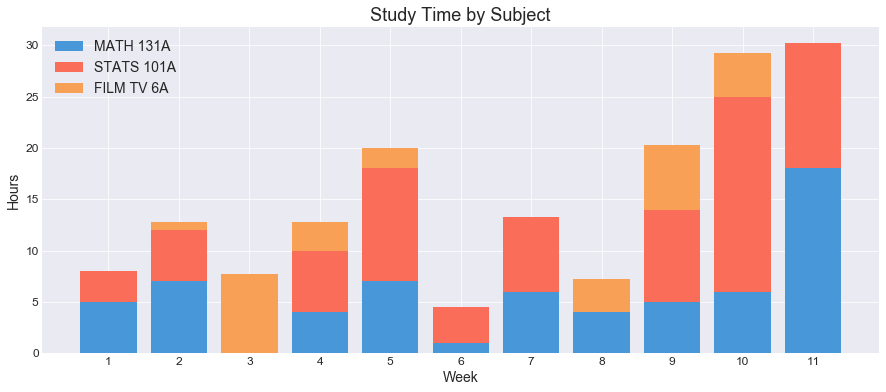

In [281]:
fig, ax = plt.subplots(figsize=(15, 6))

colors = tropical_colors[[0,2,3]]

floor = pd.Series(0, index=range(12)) # where the next bar chart should start
    
for i, subject in enumerate([math_by_week, stats_by_week, film_by_week]):
    ax.bar(x=subject.index, height=subject, linewidth=0, \
           bottom=floor[subject.index], color=colors[i], alpha=1);
    for i in subject.index: 
        floor[i] += subject[i] # gotta do it this way to avoid NaNs
    
ax.set_title("Study Time by Subject")
ax.set_xlabel("Week")
ax.set_ylabel("Hours")
ax.legend(['MATH 131A', 'STATS 101A', 'FILM TV 6A'])
ax.set_xticks(all_studying_by_week.index)

plt.show()